# **Cross Validation**

Teknik yang memungkinkan menjawab pertanyaan yang sama persis.

Pada dasarnya memungkinkan untuk mengevaluasi kinerja model machine learning

Ways to train your model



*   Option 1

  Use all available data for training and test on same dataset
  (Semua data pelatihan yang dimiliki, cukup memasukkannya ke model)

*   Option 2

  Split Available dataset into training and test sets
  (Membagi sample menjadi training dan test)
  problem: Jika data train mengandung materi aljabar sedangkan data test mengandung materi kalkulus, maka akan terjadi error

*   Option 3

  K Fold cross validation






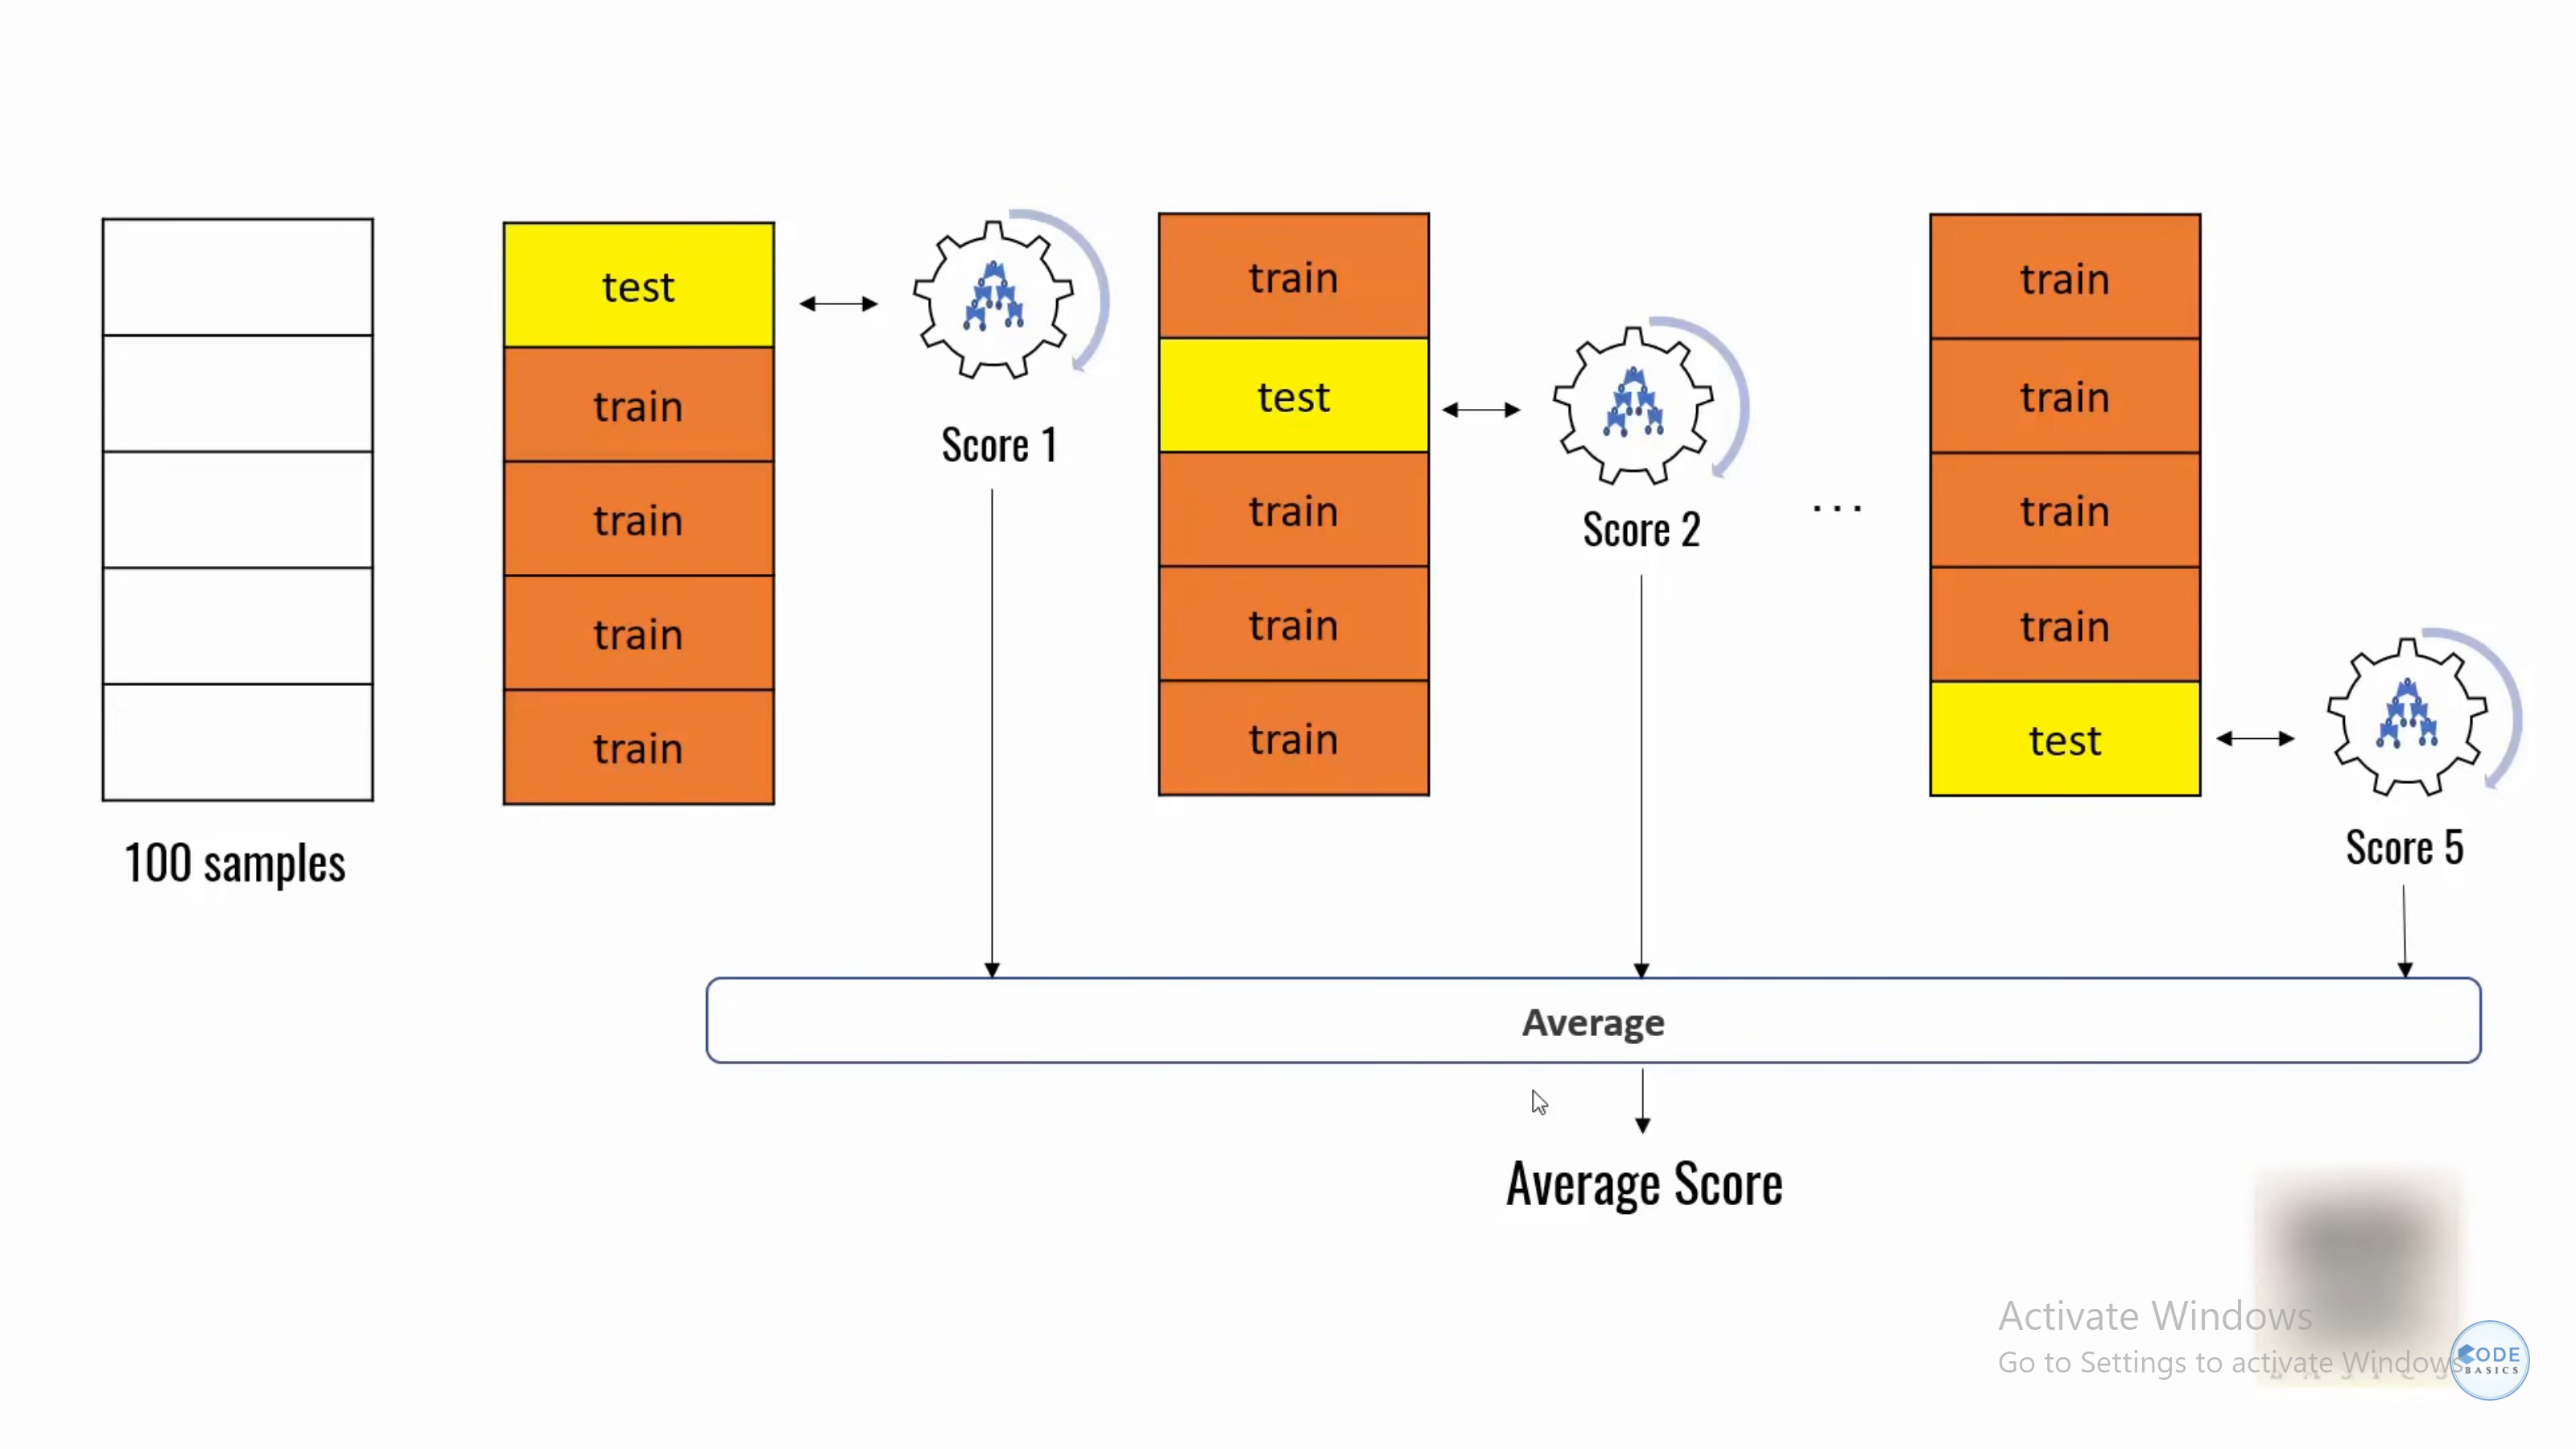

Melatih menggunakan beberapa algoritma dan model yang berbeda

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [6]:
len(digits.target)

1797

In [8]:
digits.data.shape

(1797, 64)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

logistic Regression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
#0.9583333333333334

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

SVM

In [26]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
#0.9916666666666667

0.9916666666666667

RandomForest

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
#0.9722222222222222

0.9777777777777777

#**Pertanyaan:**
**Kenapa jika pembagian datasets di ulang akan merubah semua score yang ada??**



> Karena pada saat itu, sistem akan memilih random data mana yang akan dijadikan data train maupun data test





# **K FOLD**

In [30]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)



> Data akan dibagi menjadi 3 bagian. Jadi, proses training dan testing akan dilakukan sebanyak 3 kali dengan masing-masing 1 fold sebagai data uji dan 2 fold lainnya sebagai data latih.



In [31]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [32]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [34]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)
#0.9583333333333334

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9583333333333334

In [35]:
from sklearn.model_selection import StratifiedKFold



> varian dari KFold yang memastikan bahwa setiap fold memiliki proporsi yang sama dari setiap kelas target, seperti yang ada di keseluruhan dataset. Ini sangat berguna ketika kita bekerja dengan data yang tidak seimbang (misalnya, jika satu kelas lebih banyak daripada yang lain).



In [36]:
folds = StratifiedKFold(n_splits=3) #normalnya 10 untuk data besar

In [43]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
scores_lr = []
scores_svm = []
scores_rf = []

for train_index, test_index in kf.split(digits.data):
  X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                      digits.target[train_index], digits.target[test_index]
  scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))

  scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

  scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [46]:
scores_lr

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [47]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [48]:
scores_rf

[0.9348914858096828, 0.9565943238731218, 0.9165275459098498]

# **SHORCUT**

In [44]:
from sklearn.model_selection import cross_val_score


In [49]:
cross_val_score(LogisticRegression(), digits.data, digits.target) #model, X, y
#([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [51]:
cross_val_score(SVC(), digits.data, digits.target)
#([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [53]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)
#([0.92777778, 0.91111111, 0.95543175, 0.95821727, 0.91364903])

array([0.92777778, 0.91111111, 0.95543175, 0.95821727, 0.91364903])

In [54]:
cross_val_score(RandomForestClassifier(n_estimators=10), digits.data, digits.target)
#([0.9       , 0.86666667, 0.94986072, 0.94986072, 0.8913649 ])

array([0.9       , 0.86666667, 0.94986072, 0.94986072, 0.8913649 ])

# **Exercise**

Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

1. Logistic Regression
1. SVM
1. Decision Tree
1. Random Forest



---

Gunakan dataset bunga iris dari pustaka sklearn dan gunakan cross_val_score terhadap model berikut untuk mengukur kinerja masing-masing. Pada akhirnya, cari tahu model dengan kinerja terbaik,

In [55]:
from sklearn.datasets import load_iris


In [56]:
iris = load_iris()

In [57]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [58]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(LogisticRegression(), iris.data, iris.target).mean()
#0.9733333333333334

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9733333333333334

In [62]:
cross_val_score(SVC(), iris.data, iris.target).mean()
#0.9666666666666666

0.9666666666666666

In [64]:
# prompt: import desicion tree

from sklearn.tree import DecisionTreeClassifier
cross_val_score(DecisionTreeClassifier(), iris.data, iris.target).mean()
#0.9666666666666668

0.9533333333333334

In [71]:
cross_val_score(RandomForestClassifier(n_estimators=50), iris.data, iris.target).mean()
#0.9666666666666668

0.96

# **Best Score**
 0.9733333333333334 from LOgistic Regression